In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# CPC - SPC

# Predições das lojas Rossmann

# Agenda
1. Contexto
2. Desafio
3. Desenvolvimento da solução
4. Conclusão e demonstração
5. Próximos passos

# 1. Contexto

- Reunião mensal de resultados
- CFO pediu uma previsão de vendas das próximas 6 semanas de cada loja

# 2. Desafio

## Problema
- Definição da receita para a reforma das lojas

## Causas
- Predição de vendas utilizada apresentava muitas divergências
- O processo de predição de vendas é baseada em experiências passadas
- Toda a previsão de vendas era feita manualmente pelas 1.115 lojas
- A visualização das vendas era limitada a computadores

## Solução
- Usar Machine Learning para realizar a previsão de vendas em cada loja
- Visualização das predições de vendas poderão ser feitas via Smartphone

# 3. Desenvolvimento da solução

## DESCRIÇÃO DE DADOS

In [8]:
print (f'Number of Rows: {df1.shape[0]}')
print (f'Number of Cols: {df1.shape[1]}')

Number of Rows: 1017209
Number of Cols: 18


### Descriptive Statistical

In [15]:
# central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


# Mapa Mental de Hipóteses

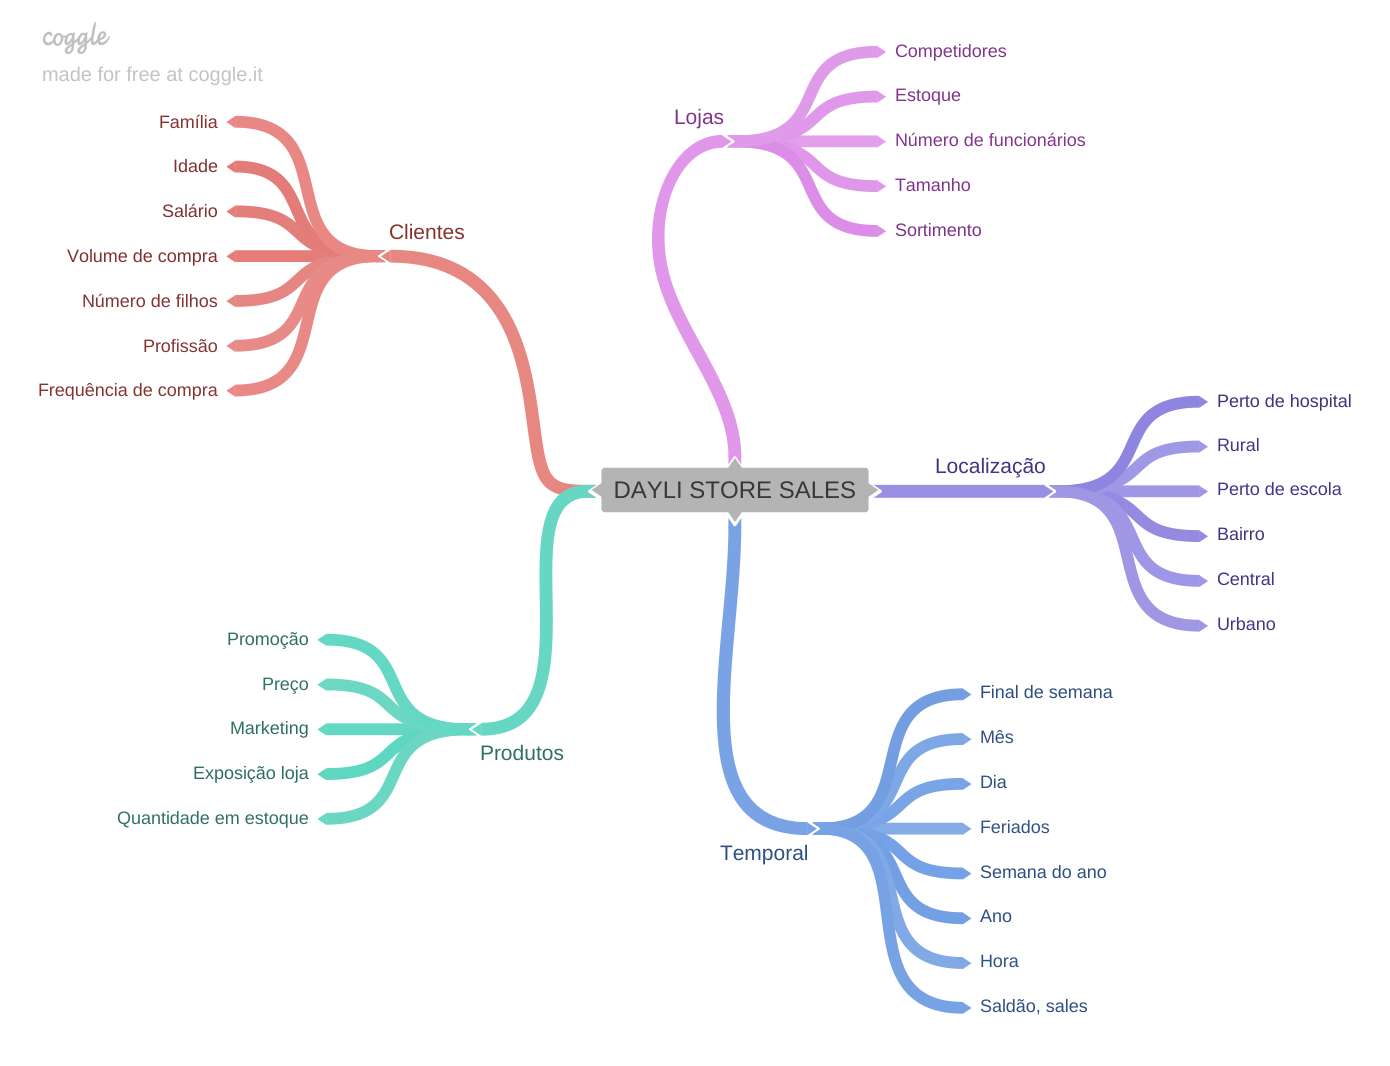

In [19]:
Image('img/DAYLI_STORE_SALES.png')

# Hipóteses

**1.** Lojas com maior sortimento deveriam vender mais.

**2.** Lojas com competidores próximos deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender menos.

**4.** Lojas com promoções ativas durante mais tempo deveriam vender mais.

**5.** Lojas com mais promoções consecutivas deveriam vender mais.

**6.** Lojas abertas durante o Natal deveriam vender mais.

**7.** Lojas deveriam vender mais ao longo dos anos.

**8.** Lojas deveriam vender mais no segundo semestre do ano.

**9.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**10.** Lojas deveriam vender mais nos fins de semana.

**11.** Lojas deveriam vender menos durante férias escolares.

# 5. Próximos passos

# 4. Conclusão e demonstração

In [18]:
df2 = df1.copy()

In [24]:
cols_drop = ['customers', 'open', 'promo_interval', 'month_map']
df3 = df3.drop( cols_drop, axis=1 )

## Passo 04 - 4.0. ANÁLISE EXPLORATÓRIA DE DADOS

In [25]:
df4 = df3.copy()

#### 4.1.1. Response variable

<AxesSubplot: xlabel='sales', ylabel='Count'>

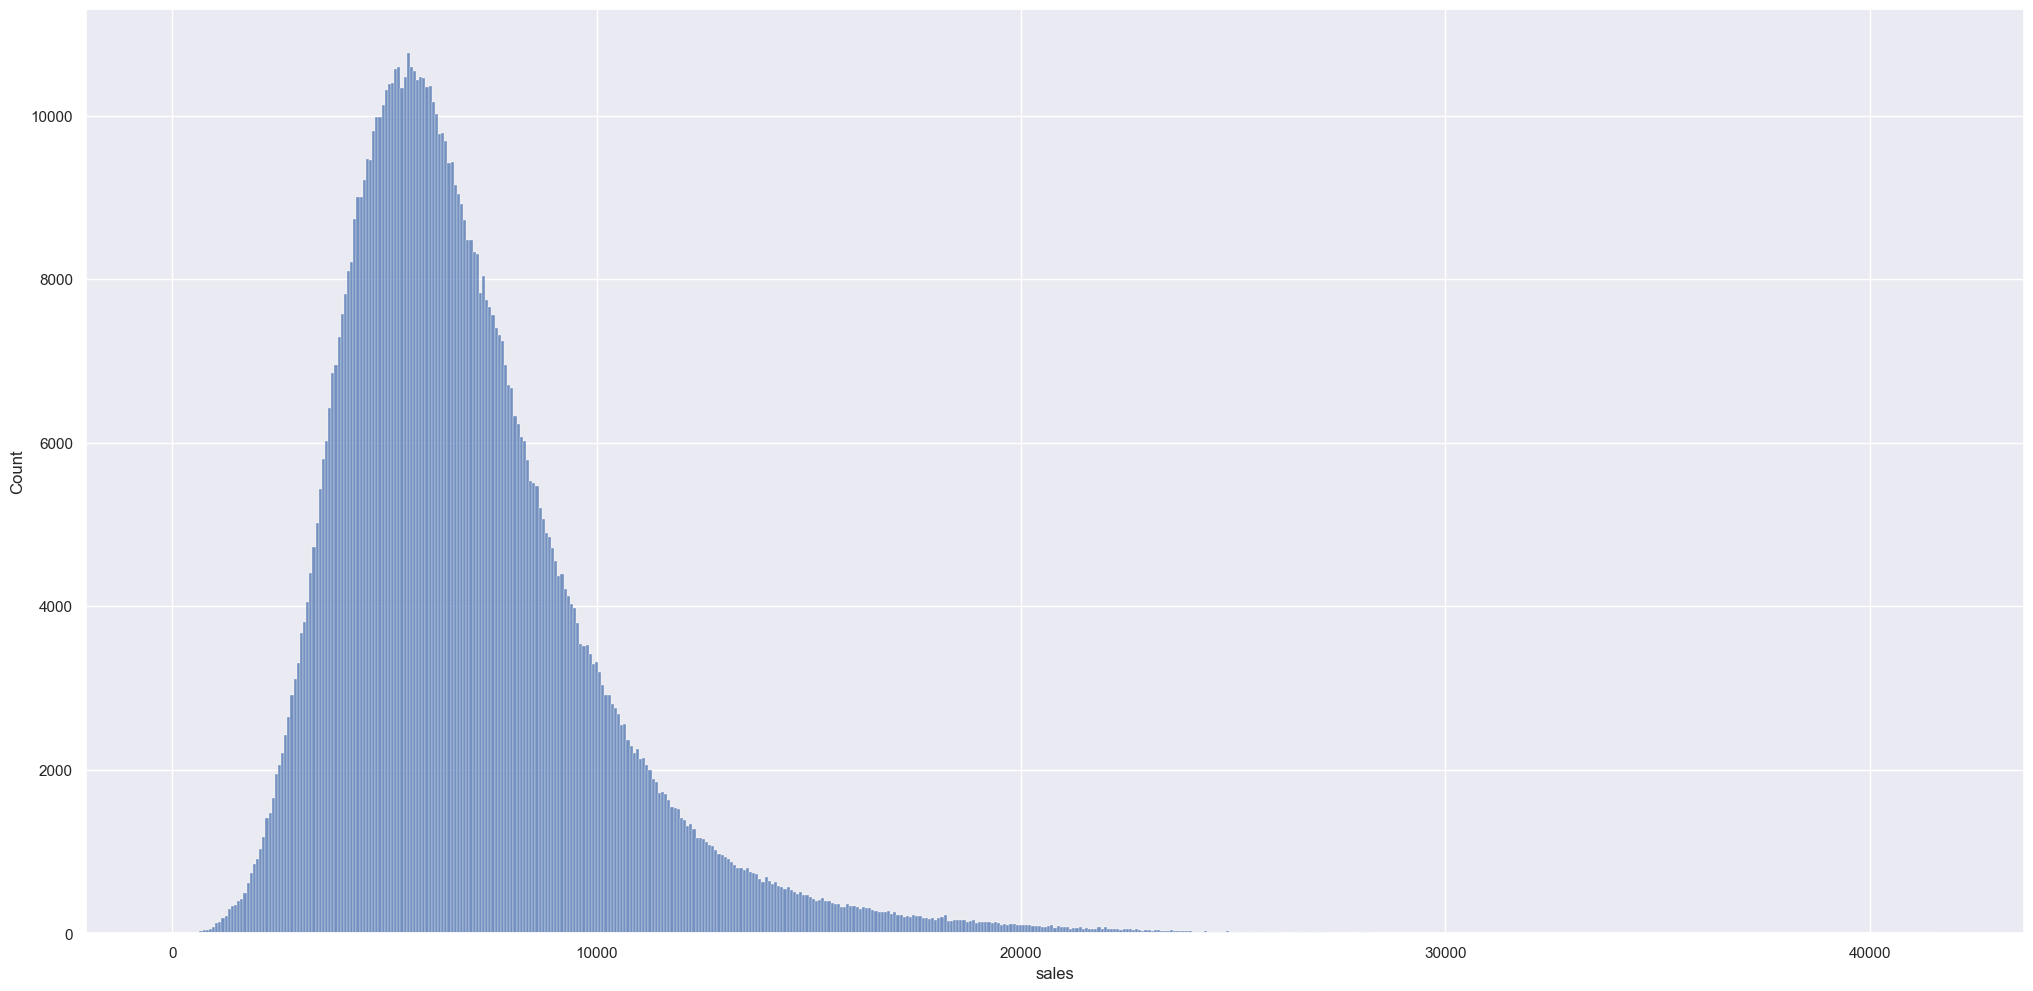

In [26]:
sns.histplot(df4['sales'], kde = False)

#### 4.1.2. Numerical variable

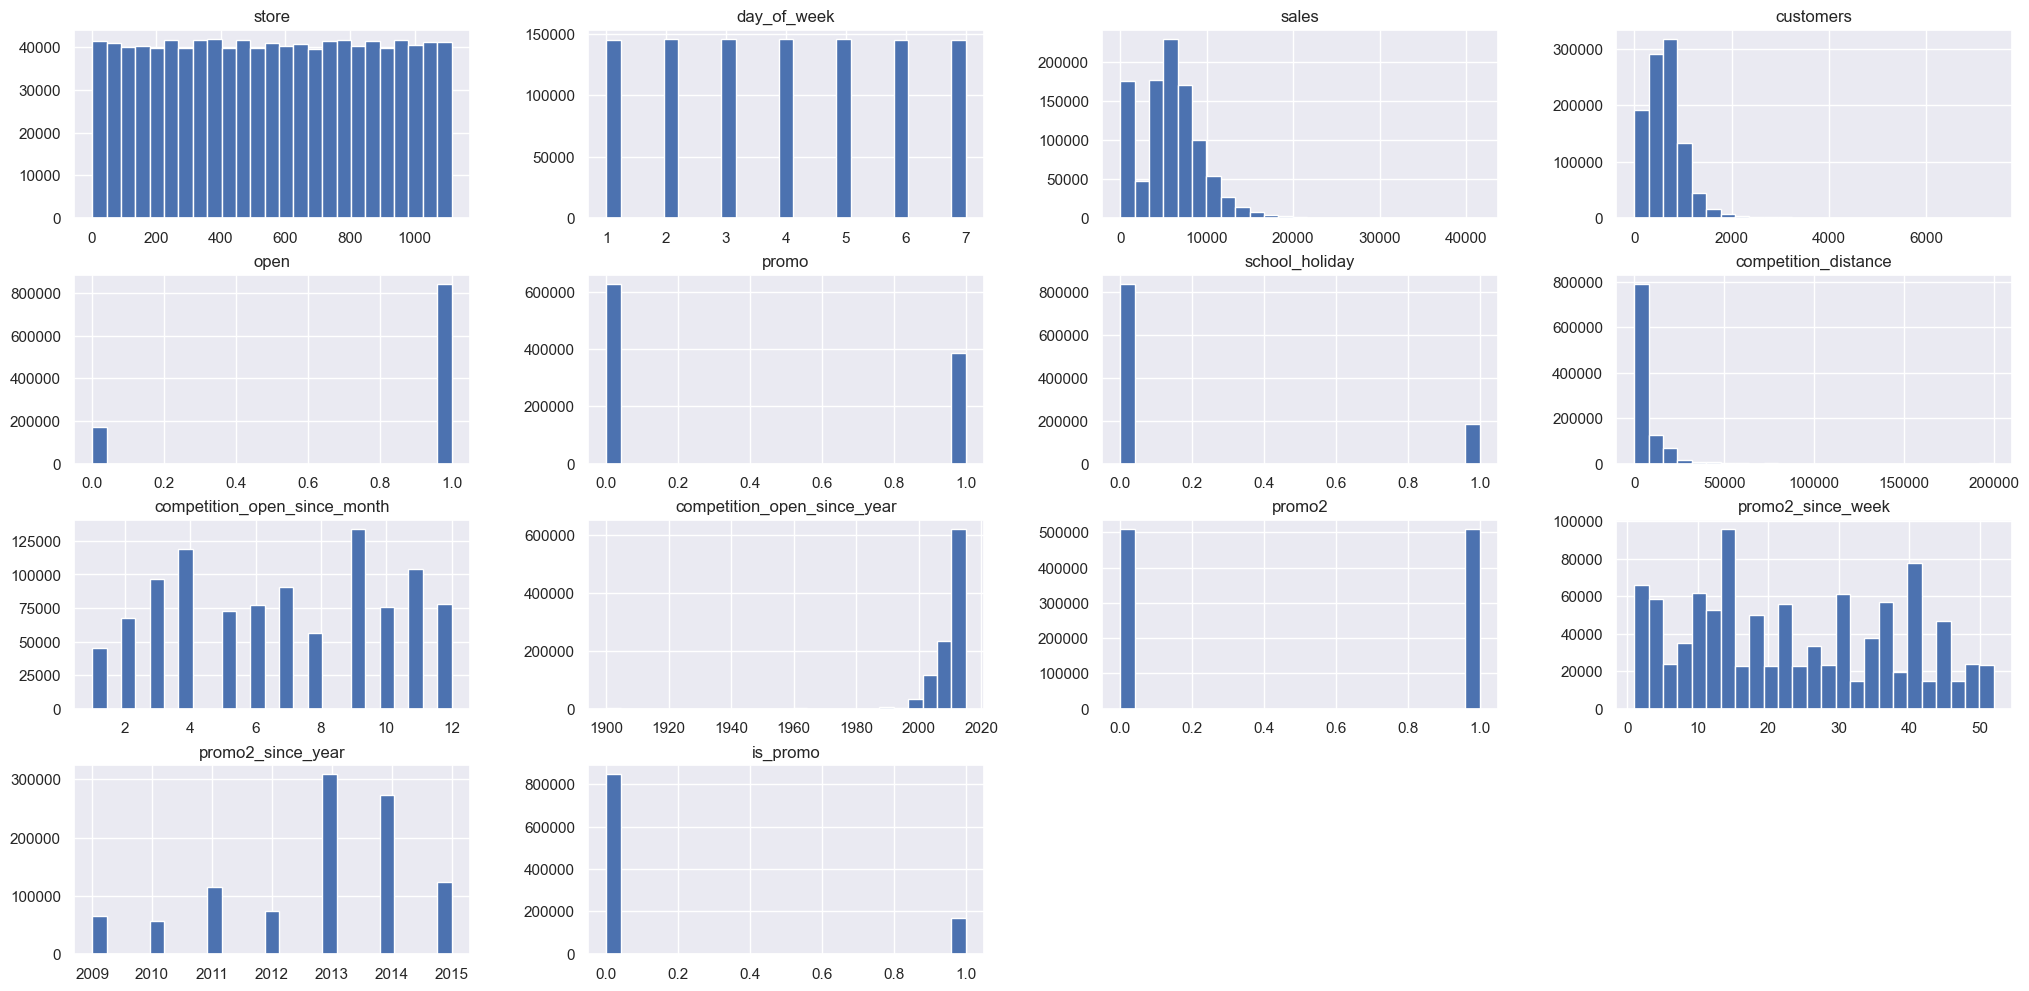

In [27]:
num_attributes.hist (bins = 25);

#### 4.1.3. Categorical variable

In [28]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

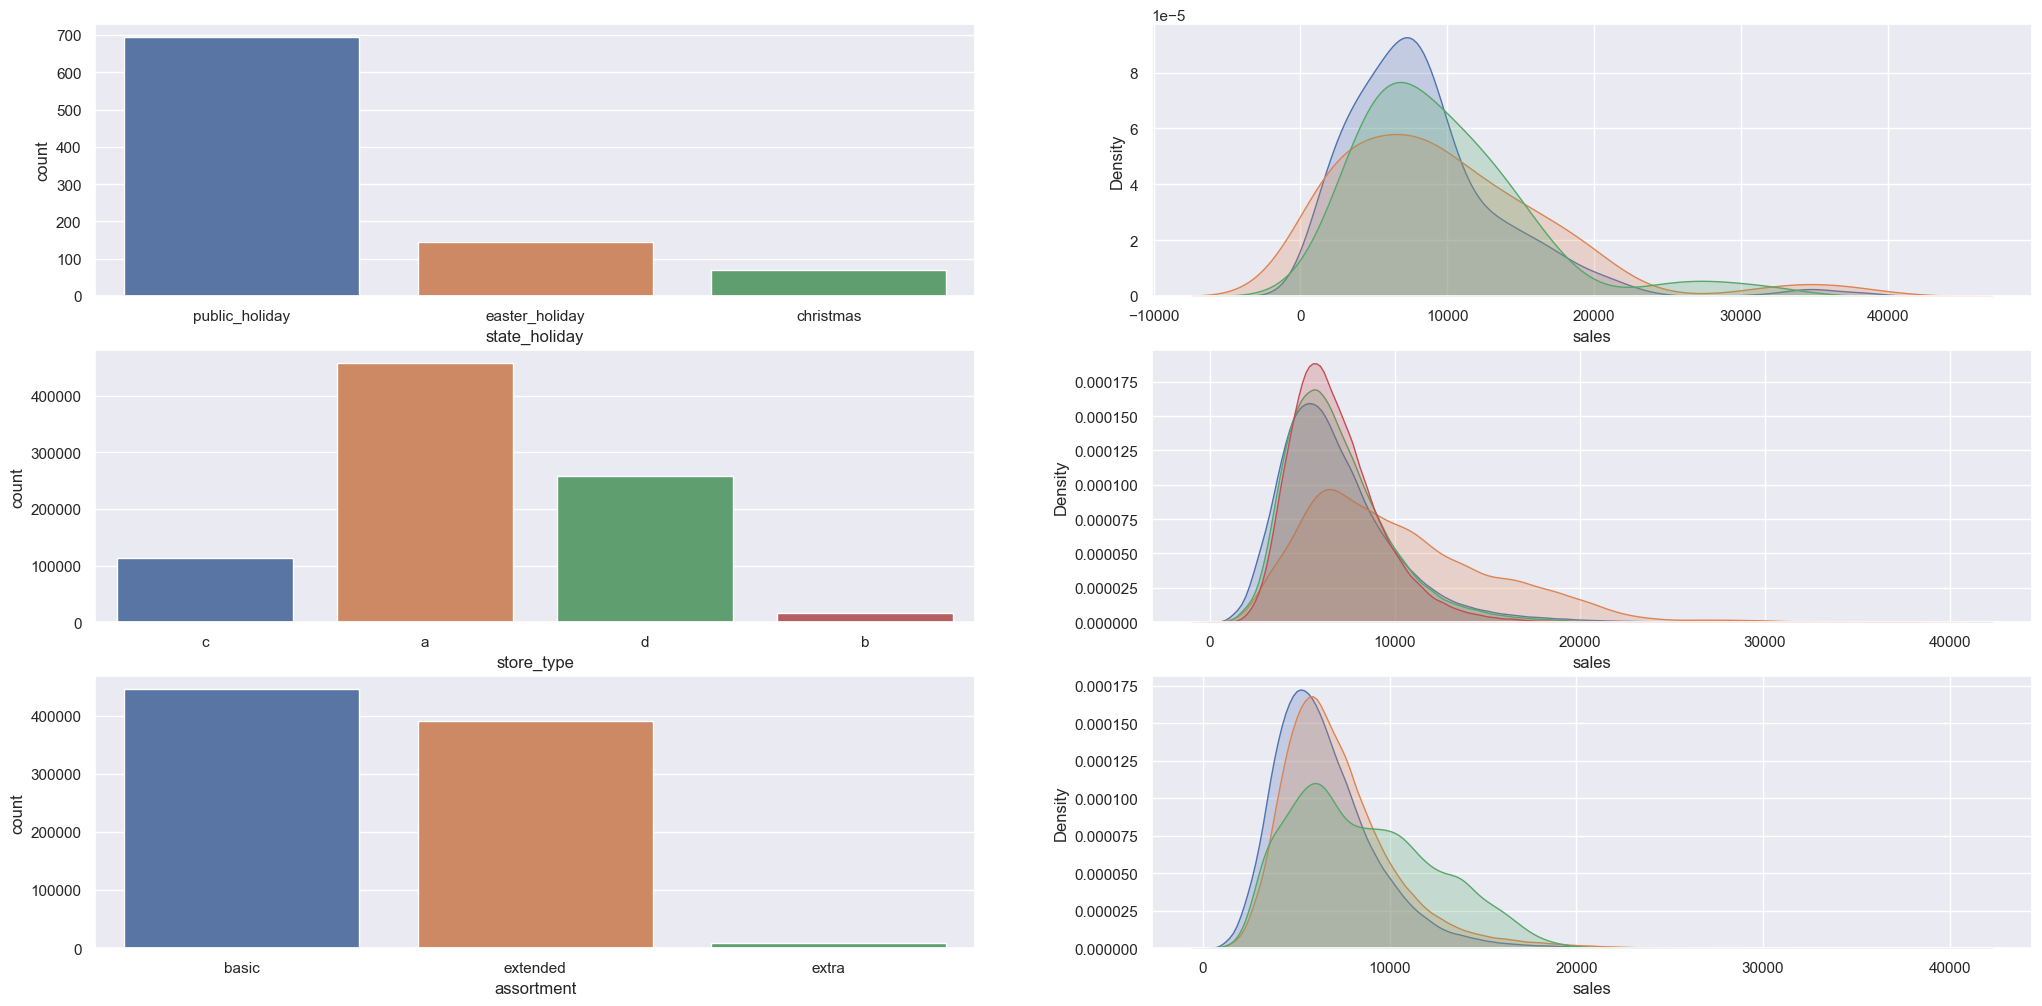

In [29]:
# state_holiday
a = df4[df4['state_holiday'] != 'regular_day']
plt.subplot (3, 2, 1)
sns.countplot( x = 'state_holiday', data = a )

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill=True)
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', fill=True)
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', fill=True)

# store_type
plt.subplot (3, 2, 3)
sns.countplot( x = 'store_type', data = df4 )

plt.subplot( 3, 2, 4)
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', fill=True)
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', fill=True)
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', fill=True)
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', fill=True)

# assortment
plt.subplot (3, 2, 5)
sns.countplot (x = 'assortment', data = df4)

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label='basic', fill=True);
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended', fill=True);
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label='extra', fill=True);

### 4.2. Análise bivariada

#### H2. Lojas com competidores próximos deveriam vender menos.
**FALSO** - Não há alteração

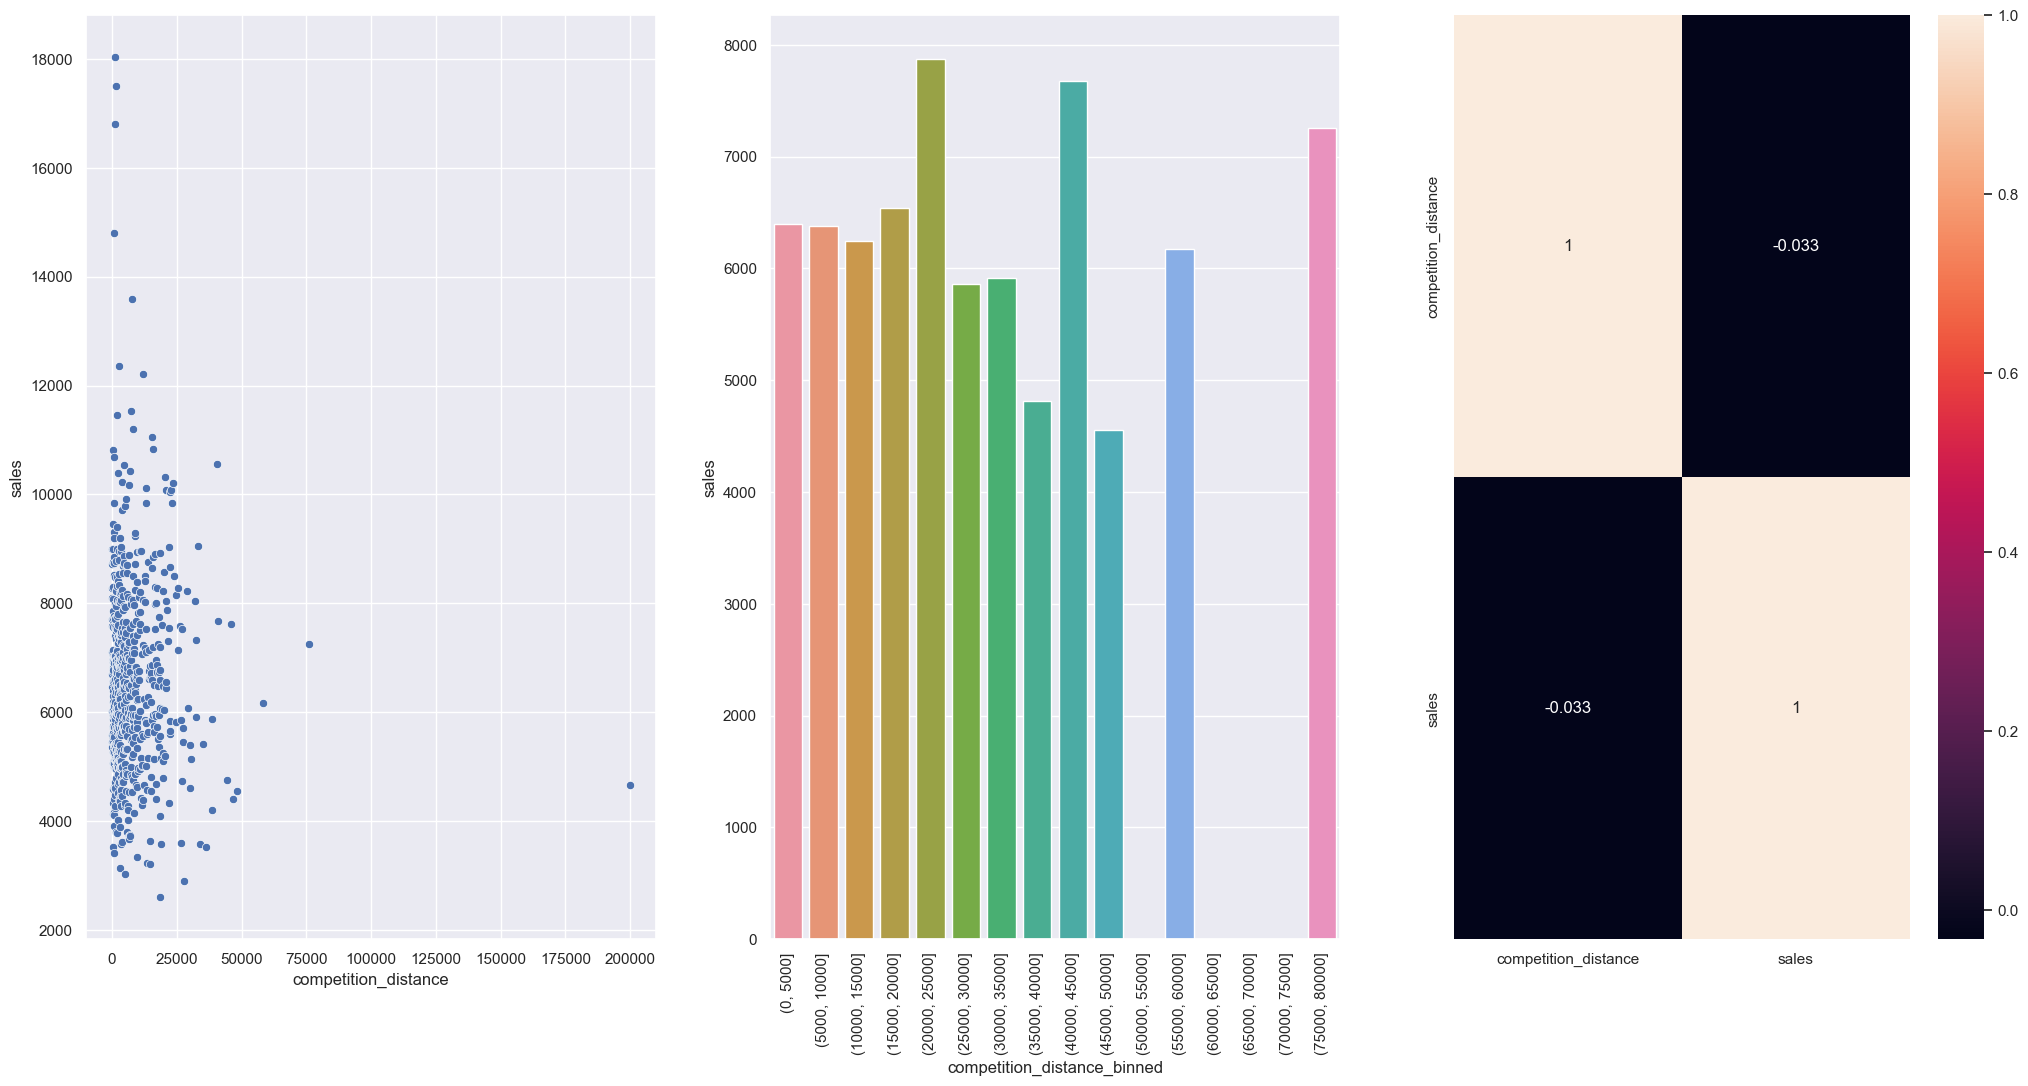

In [31]:
aux1 = df4[['competition_distance', 'sales']].groupby('competition_distance').median().reset_index()

plt.subplot (1, 3, 1)
sns.scatterplot (x = 'competition_distance', y = 'sales', data = aux1)

plt.subplot (1, 3, 2)
bins = list(np.arange(0, 80001, 5000))

aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins = bins)
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').median().reset_index()

sns.barplot(x = 'competition_distance_binned', y = 'sales', data = aux2);
plt.xticks(rotation = 90);

plt.subplot (1, 3, 3)
sns.heatmap (aux1.corr (method = 'pearson'), annot = True);

#### H4. Lojas com promoções ativas durante mais tempo deveriam vender mais.
**VERDADEIRO**

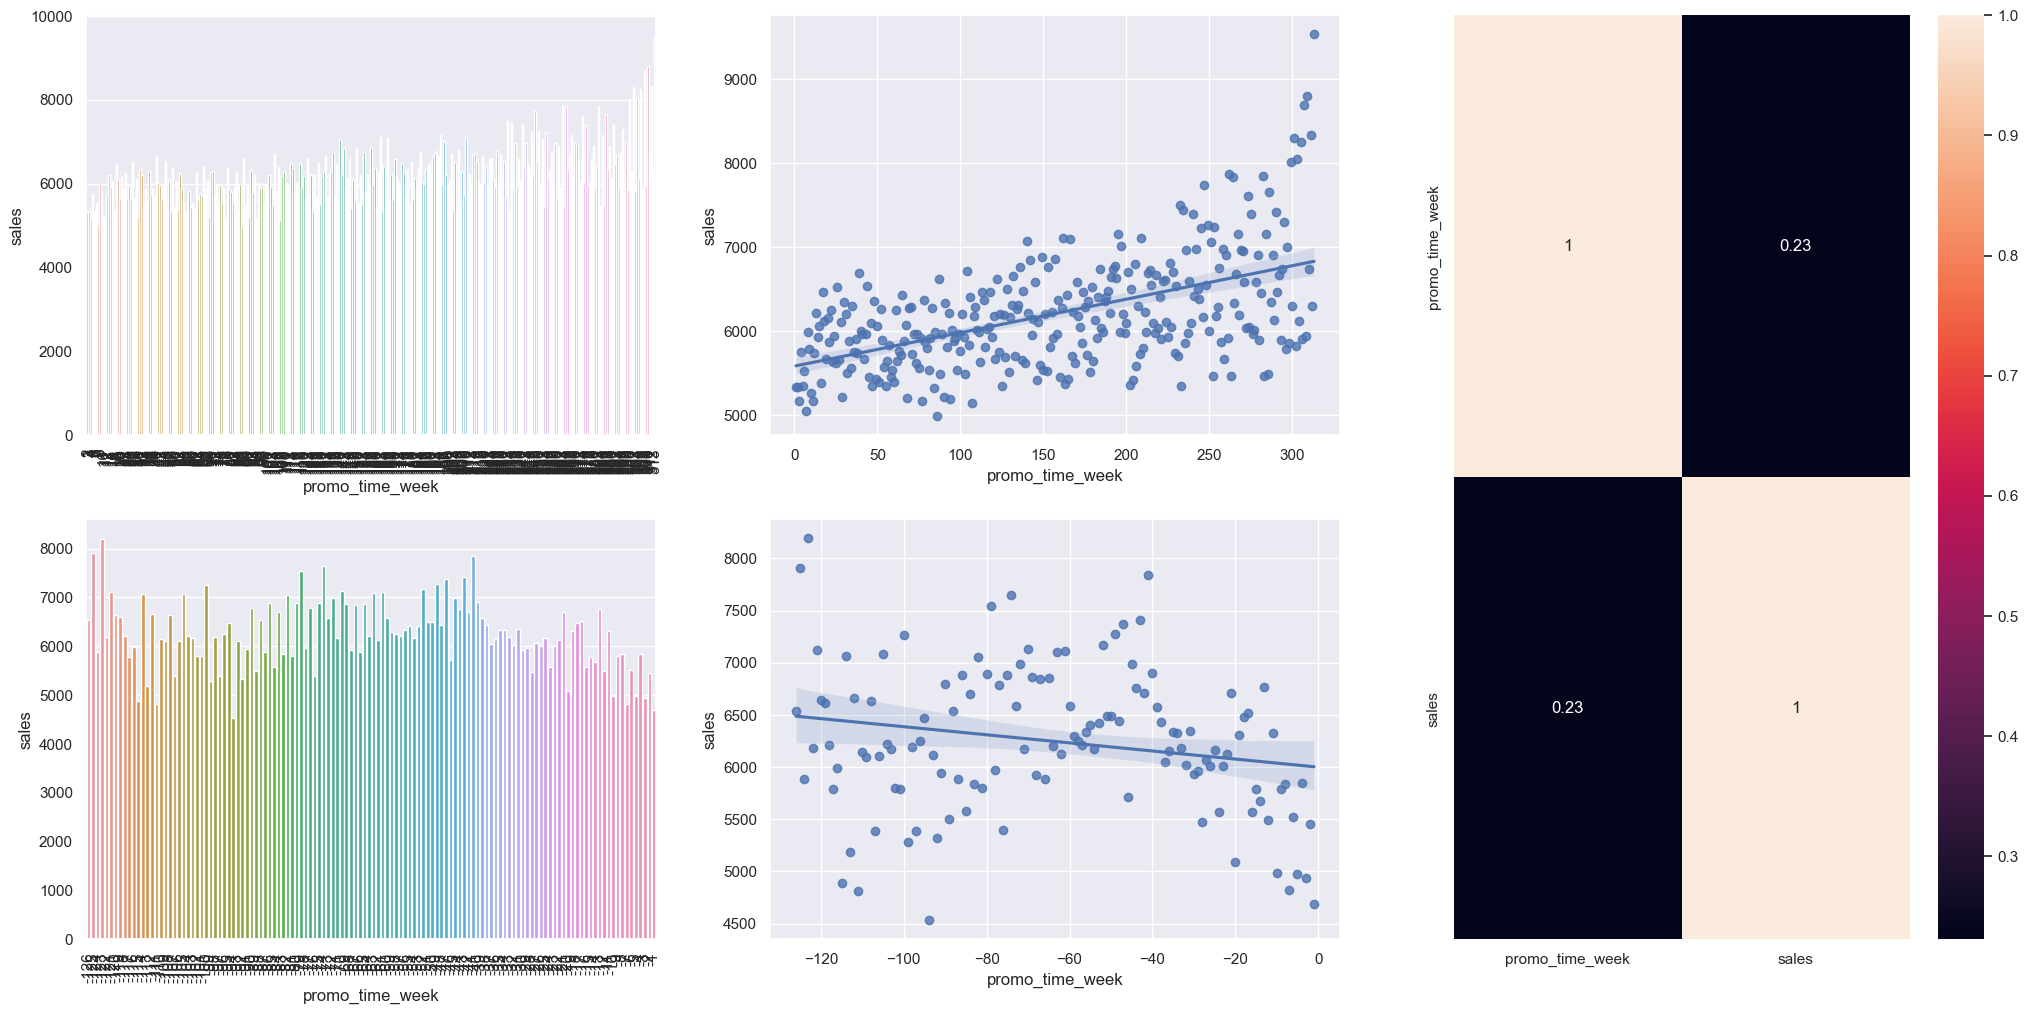

In [33]:
aux1 = df4[['promo_time_week', 'sales']].groupby('promo_time_week').median().reset_index()

grid = GridSpec (2, 3)

plt.subplot (grid[0, 0])
aux2 = aux1[aux1['promo_time_week'] > 0] # promo extendido
sns.barplot (x = 'promo_time_week', y = 'sales', data = aux2);
plt.xticks (rotation = 90);

plt.subplot (grid[0, 1])
sns.regplot (x = 'promo_time_week', y = 'sales', data = aux2);

plt.subplot (grid[1, 0])
aux3 = aux1[aux1['promo_time_week'] < 0] # promo regular
sns.barplot (x = 'promo_time_week', y = 'sales', data = aux3);
plt.xticks (rotation = 90);

plt.subplot (grid[1, 1])
sns.regplot (x = 'promo_time_week', y = 'sales', data = aux3);

plt.subplot (grid[:,2])
sns.heatmap (aux1.corr (method = 'pearson'), annot = True);

#### H7. Lojas deveriam vender mais ao longo dos anos.
**VERDADEIRO**

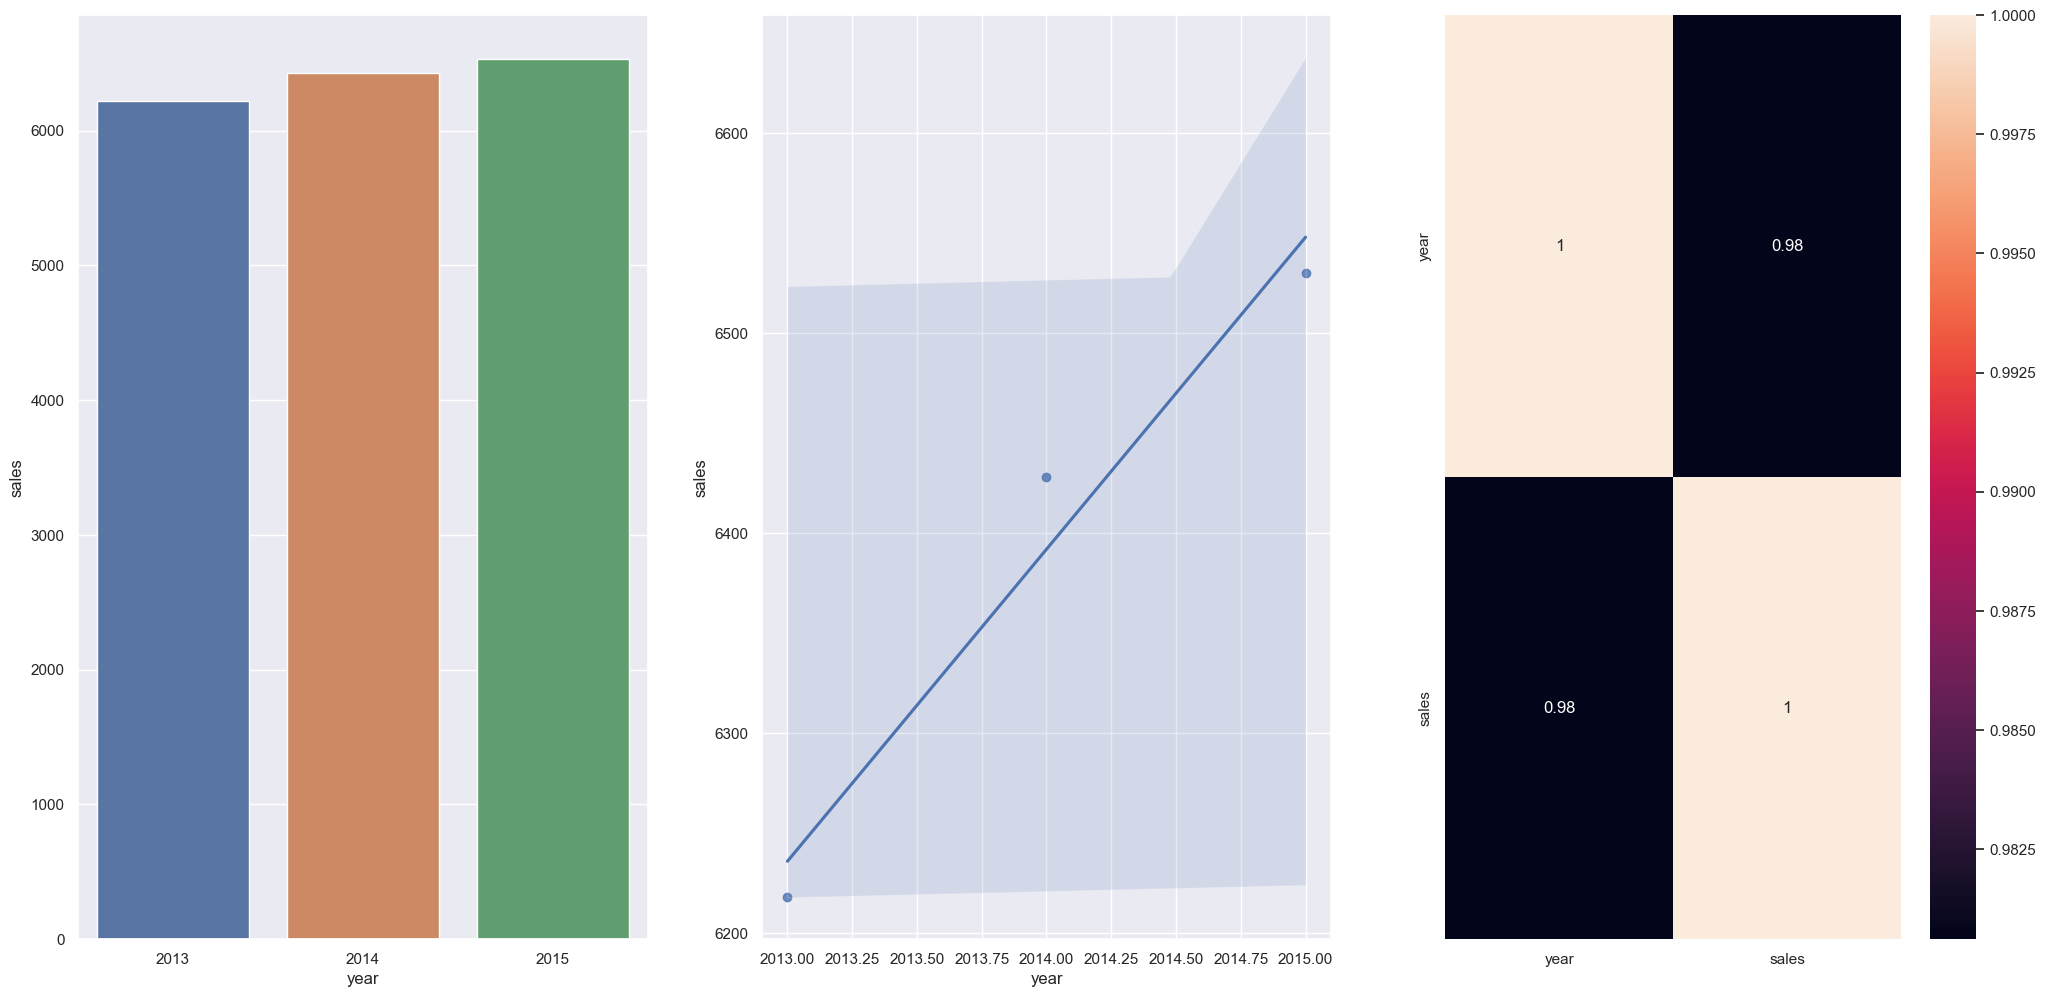

In [36]:
aux1 = df4[['year', 'sales']].groupby('year').median().reset_index()
plt.subplot (1, 3, 1)
sns.barplot (x = 'year', y = 'sales', data = aux1);

plt.subplot (1, 3, 2)
sns.regplot (x = 'year', y = 'sales', data = aux1);

plt.subplot (1, 3, 3)
sns.heatmap (aux1.corr (method = 'pearson'), annot = True);

#### 4.2.1. Resumo hipóteses

In [41]:
tab = [['Hipótese', 'Conclusão', 'Relevância'], 
       ['H1', 'Verdadeira', 'Alta'],
       ['H2', 'Falso', 'Baixa'],
       ['H3', 'Verdadeira', 'Alta'],
       ['H4', 'Verdadeira', 'Média'],
       ['H5', 'Falso', 'Baixa'],
       ['H6', 'Verdadeira', 'Média'],
       ['H7', 'Verdadeira', 'Alta'],
       ['H8', 'Verdadeira', 'Média'],
       ['H9', 'Falso', 'Média'],
       ['H10', 'Falso', 'Médio'],
       ['H11', 'Falso', 'Baixo']]
print (tabulate(tab, headers = 'firstrow'))

Hipótese    Conclusão    Relevância
----------  -----------  ------------
H1          Verdadeira   Alta
H2          Falso        Baixa
H3          Verdadeira   Alta
H4          Verdadeira   Média
H5          Falso        Baixa
H6          Verdadeira   Média
H7          Verdadeira   Alta
H8          Verdadeira   Média
H9          Falso        Média
H10         Falso        Médio
H11         Falso        Baixo


### 4.3. Análise multivariada
1. Lojas com maior sortimento deveriam vender mais.

2. Lojas com competidores próximos deveriam vender menos.

3. Lojas com competidores a mais tempo deveriam vender menos.

#### 4.3.1. Numerical attributes

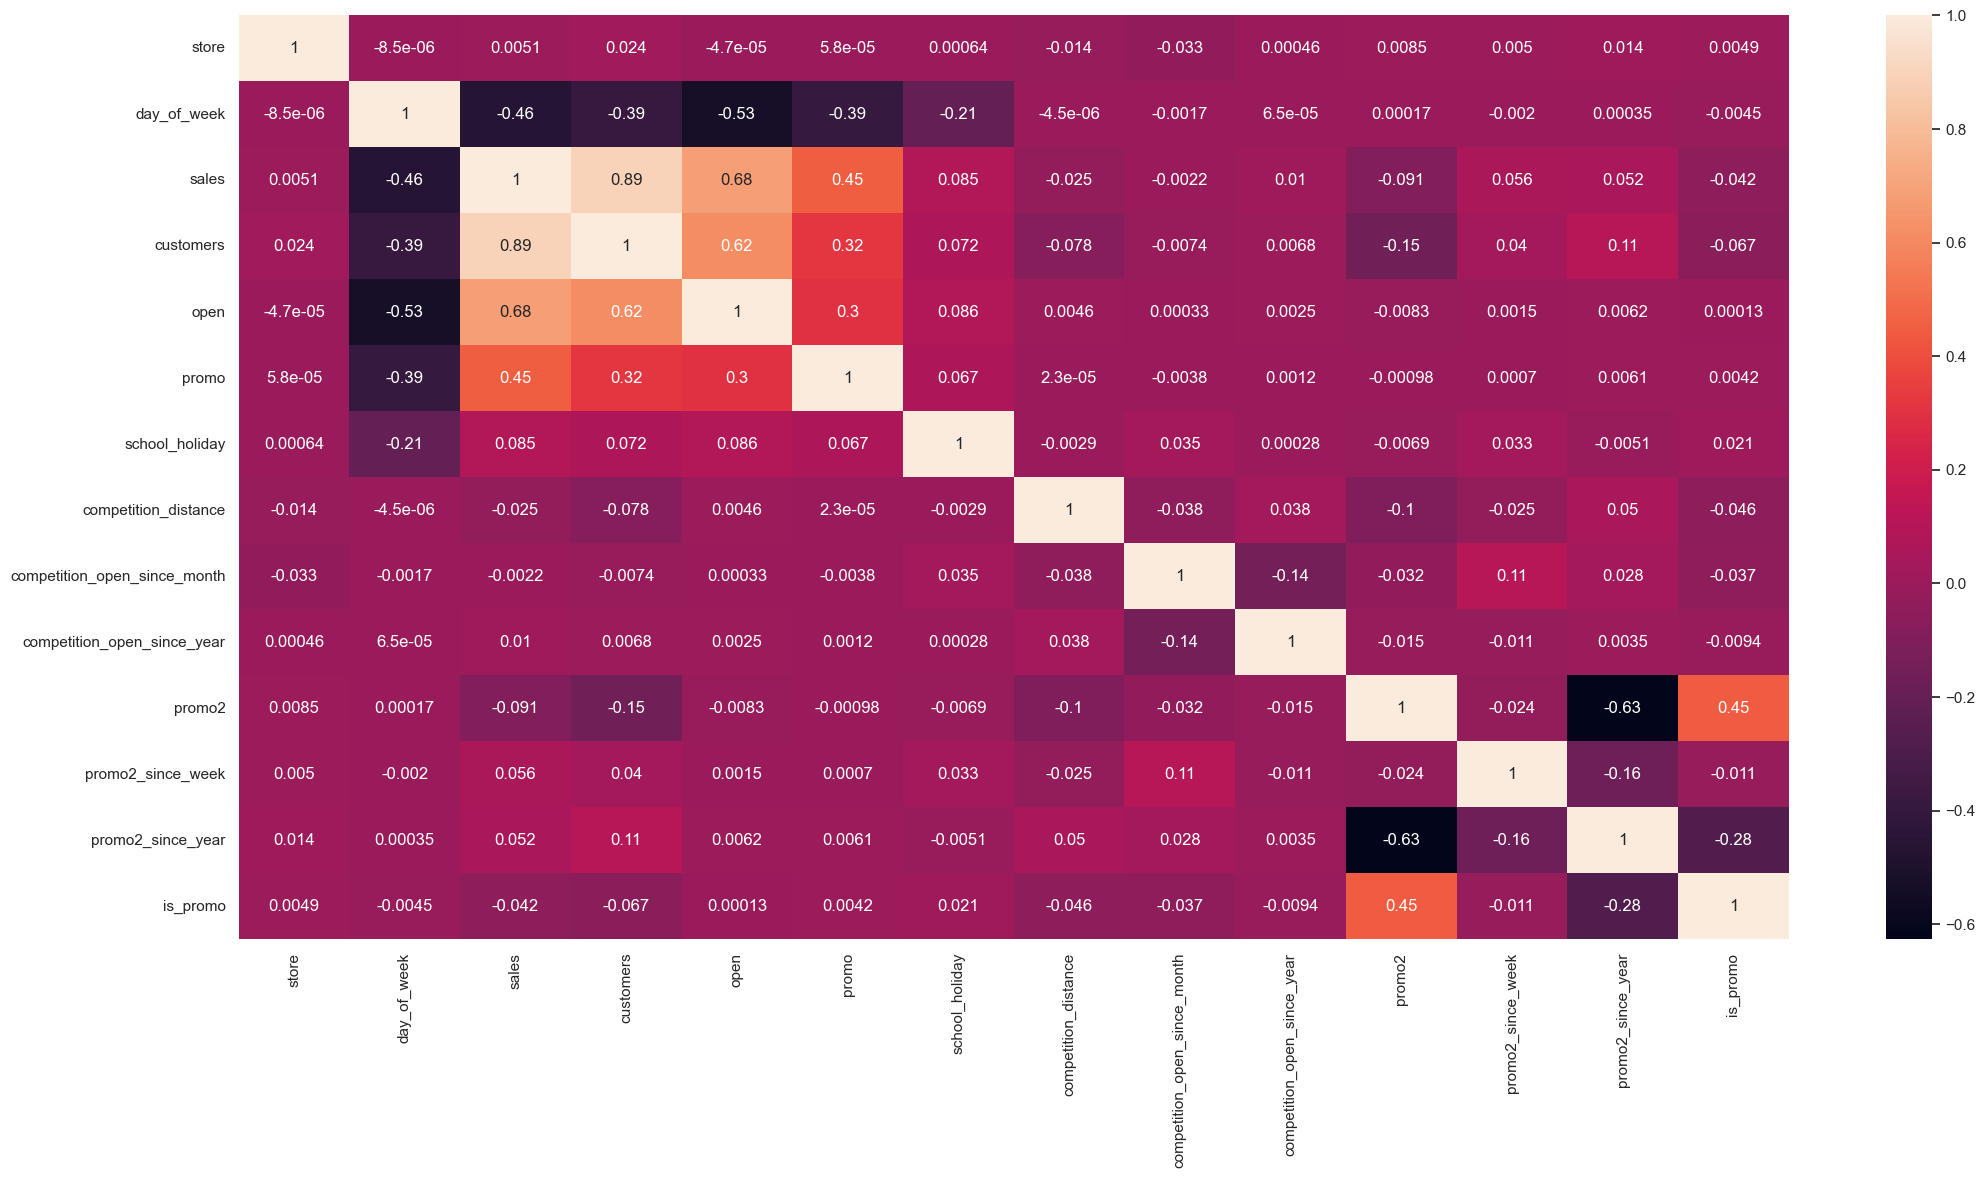

In [42]:
correlation = num_attributes.corr (method = 'pearson')
sns.heatmap (correlation, annot = True);

#### 4.3.2. Categorical attributes

In [43]:
a = df4.select_dtypes (include = 'object')
a1 = cramers_v (a['state_holiday'], a['state_holiday'])
a2 = cramers_v (a['state_holiday'], a['store_type'])
a3 = cramers_v (a['state_holiday'], a['assortment'])

a4 = cramers_v (a['store_type'], a['state_holiday'])
a5 = cramers_v (a['store_type'], a['store_type'])
a6 = cramers_v (a['store_type'], a['assortment'])

a7 = cramers_v (a['assortment'], a['state_holiday'])
a8 = cramers_v (a['assortment'], a['store_type'])
a9 = cramers_v (a['assortment'], a['assortment'])

d = pd.DataFrame ({'state_holiday': [a1, a2, a3], 'store_type': [a4, a5, a6], 'assortment': [a7, a8, a9]})
d = d.set_index (d.columns)
d

,state_holiday,store_type,assortment
state_holiday,1.000000,0.071040,0.067519
store_type,0.071040,1.000000,0.538454
assortment,0.067519,0.538454,1.000000


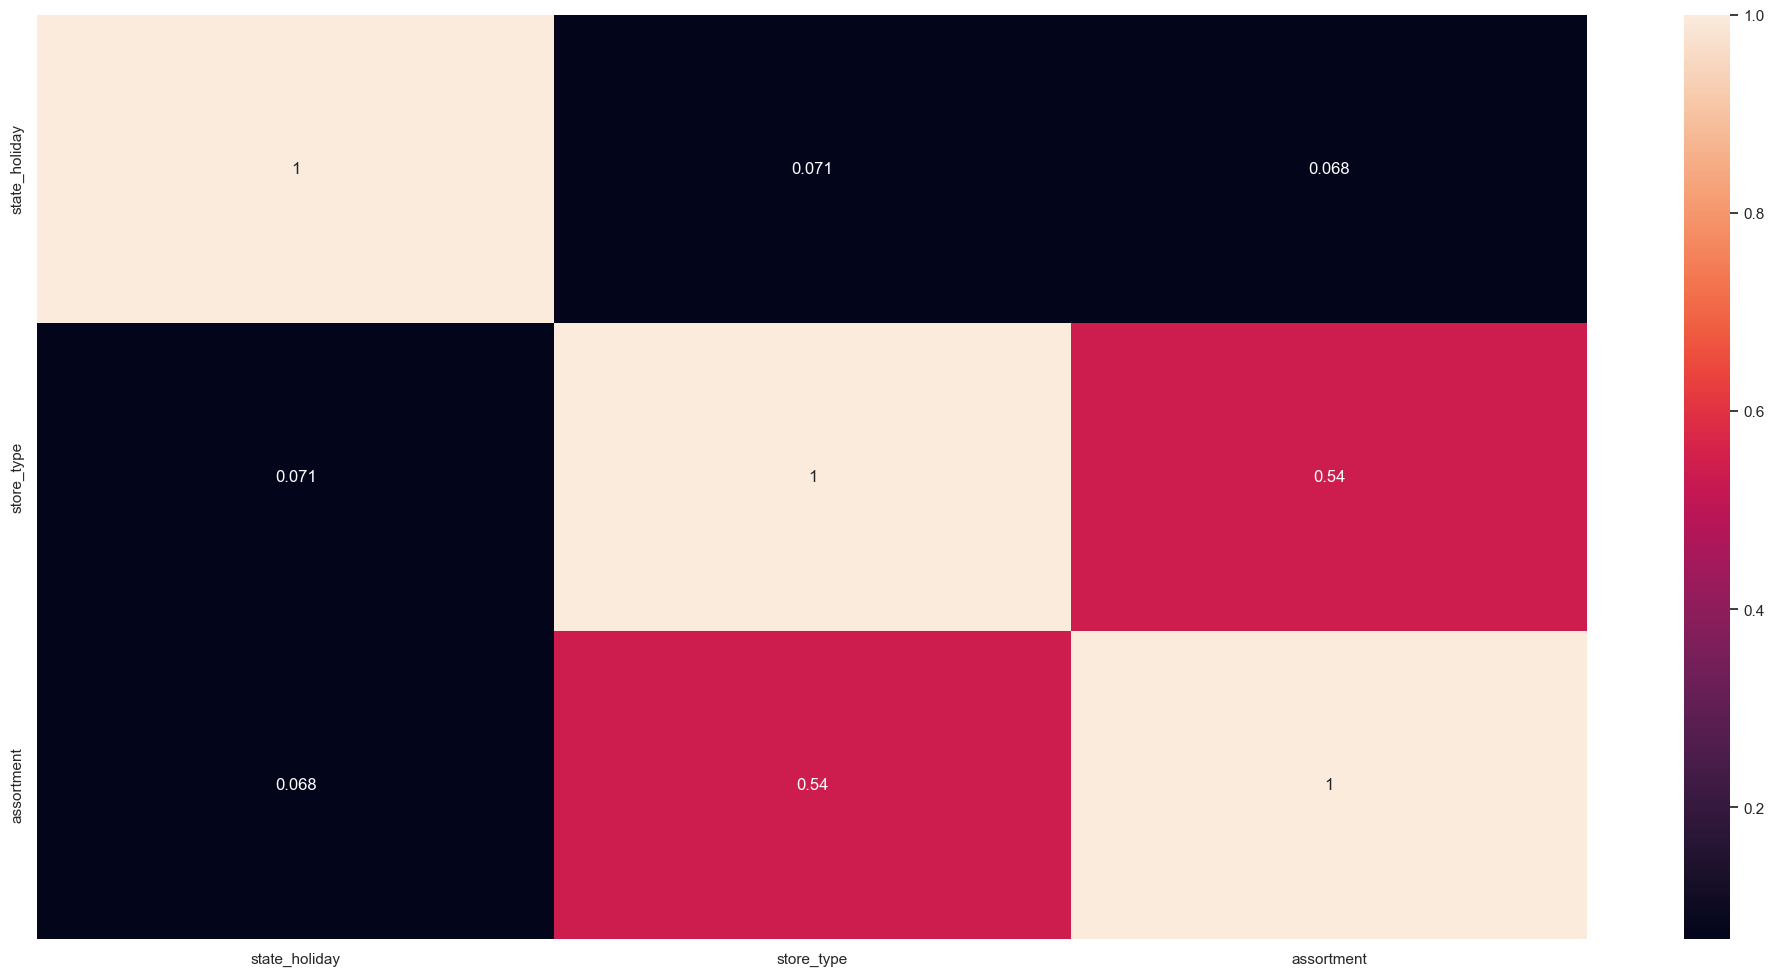

In [44]:
sns.heatmap (d, annot = True);

## 7.0. PASSO 07 - Machine learning modeling

In [63]:
X_train = x_train[cols_selected_boruta]
X_test = x_test[cols_selected_boruta]

# Time series data preparation
x_training = x_train[cols_selected_boruta_full]

### 7.1. Average model

In [64]:
aux1 = X_test.copy()
aux1['sales'] = y_test.copy()

# prediction
aux2 = aux1[['store', 'sales']].groupby('store').mean().reset_index().rename(columns = {'sales': 'predictions'})
aux1 = pd.merge(aux1, aux2, how='left', on='store')
yhat_baseline = aux1['predictions']

# performance
baseline_result = ml_error('Average Model', np.expm1(y_test), np.expm1(yhat_baseline))
baseline_result

,Model Name,MAE,MAPE,RMSE
0,Average Model,1354.800353,0.2064,1835.135542


### 7.2. Linear regression model

In [65]:
# model
lr = LinearRegression().fit(X_train, y_train)

# prediction
yhat_lr = lr.predict(X_test)

# performance
lr_result = ml_error ('Linear Regression', np.expm1 (y_test), np.expm1 (yhat_lr))
lr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression,1867.089774,0.292694,2671.049215


#### 7.2.1. Linear regression model - Cross validation

In [66]:
lr_result_cv = cross_validation(x_training, 5, 'Linear Regression', lr)
lr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37


### 7.3. Linear regression regularized model - Lasso

In [67]:
# model
lrr = Lasso(alpha = 0.01).fit(X_train, y_train)

# prediction
yhat_lrr = lrr.predict(X_test)

# performance
lrr_result = ml_error ('Linear Regression - Lasso', np.expm1 (y_test), np.expm1 (yhat_lrr))
lrr_result

,Model Name,MAE,MAPE,RMSE
0,Linear Regression - Lasso,1891.704881,0.289106,2744.451737


lr_result_cv = cross_validation(x_training, 5, 'Linear Regression', lr)
lr_result_cv#### 7.3.1. Lasso - Cross validation

In [68]:
lrr_result_cv = cross_validation(x_training, 5, 'Lasso', lrr)
lrr_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Lasso,2116.38 +/- 341.5,0.29 +/- 0.01,3057.75 +/- 504.26


### 7.4. Random forest regressor

In [69]:
## model
#rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 10).fit(X_train, y_train)
#
## prediction
#yhat_rf = rf.predict(X_test)
#
## performance
#rf_result = ml_error ('Random Forest Regressor', np.expm1 (y_test), np.expm1 (yhat_rf))
#rf_result

#### 7.4.1. Random forest regressor - Cross validation

In [70]:
rf_result_cv = cross_validation(x_training, 5, 'Random Forest', rf)
rf_result_cv

NameError: name 'rf' is not defined

### 7.5. XGBoost regressor

In [ ]:
## model
#model_xgb = xgb.XGBRegressor(objective='reg:squarederror',
#                              n_estimators=100,
#                              eta=0.01,
#                              max_depth=10,
#                              subsample=0.7,
#                              colsample_bytree=0.9 ).fit( X_train, y_train )
## prediction
#yhat_xgb = model_xgb.predict(X_test)
#
## performance
#xgb_result = ml_error( 'XGBoost Regressor', np.expm1(y_test), np.expm1(yhat_xgb))
#xgb_result

#### 7.5.1. XGBoost regressor - Cross validation

In [ ]:
#xgb_result_cv = cross_validation(x_training, 5, 'XGBoost Regressor', model_xgb)
#xgb_result_cv

### 7.6. Models performance comparation

#### 7.6.1. Single performance

In [ ]:
#modelling_result = pd.concat([baseline_result, lr_result, lrr_result, rf_result, xgb_result])
#modelling_result.sort_values('RMSE')

#### 7.6.2. Real performance - Cross validation

In [1]:
modelling_result_cv = pd.concat([lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv])
modelling_result_cv.sort_values('RMSE CV')

NameError: name 'pd' is not defined

## 8.0. PASSO 08 - Hyperparameter fine tuning

### 8.1. Random search

In [ ]:
#param = {'n_estimators': [1500, 1700, 2500, 3000, 3500],
#         'eta': [0.01, 0.03],
#         'max_depth': [3, 5, 9],
#         'subsample': [0.1, 0.5, 0.7],
#         'colsample_bytree': [0.3, 0.7, 0.9],
#         'min_child_weight': [3, 8, 15]}
#MAX_EVAL = 5

In [ ]:
#final_result = pd.DataFrame()
#
#for i in range( MAX_EVAL ):
#    # choose values for parameters randomly
#    hp = {k: random.sample(v, 1)[0] for k, v in param.items()}
#    print(hp)
#    # model
#    model_xgb = xgb.XGBRegressor(objective='reg:squarederror',
#    n_estimators=hp['n_estimators'],
#    eta=hp['eta'],
#    max_depth=hp['max_depth'],
#    subsample=hp['subsample'],
#    colsample_bytree=hp['colsample_bytree'],
#    min_child_weight=hp['min_child_weight'])
#
#    # performance
#    result = cross_validation(x_training, 5, 'XGBoost Regressor', model_xgb, verbose=True)
#    final_result = pd.concat([final_result, result])
#
#final_result

### 8.2. Final model

In [72]:
# param tuned
param_tuned = {'n_estimators': 1700,
               'eta': 0.03,
               'max_depth': 9,
               'subsample': 0.5,
               'colsample_bytree': 0.3,
               'min_child_weight': 3}

# model
model_xgb_tuned = xgb.XGBRegressor(objective='reg:squarederror',
                                   n_estimators=param_tuned['n_estimators'],
                                   eta=param_tuned['eta'],
                                   max_depth=param_tuned['max_depth'],
                                   subsample=param_tuned['subsample'],
                                   colsample_bytree=param_tuned['colsample_bytree'],
                                   min_child_weight=param_tuned['min_child_weight']).fit( X_train, y_train )

#xgb_result_tuned = cross_validation(x_training, 5, 'XGBoost Regressor', model_xgb_tuned)

In [74]:
yhat_xgb_tuned = model_xgb_tuned.predict(X_test)

In [ ]:
## model
#model_xgb_tuned = xgb.XGBRegressor(objective='reg:squarederror',
#                                   n_estimators=param_tuned['n_estimators'],
#                                   eta=param_tuned['eta'],
#                                   max_depth=param_tuned['max_depth'],
#                                   subsample=param_tuned['subsample'],
#                                   colsample_bytree=param_tuned['colsample_bytree'],
#                                   min_child_weight=param_tuned['min_child_weight'])
#
#xgb_result_tuned = cross_validation(x_training, 5, 'XGBoost Regressor', model_xgb_tuned)

In [ ]:
#xgb_result_tuned
X_test.head()

## 9.0. PASSO 09 - Tradução e interpretação do erro

In [75]:
df9 = x_test[cols_selected_boruta_full]

# rescale
df9['sales'] = np.expm1(df9['sales'])
df9['predictions'] = np.expm1(yhat_xgb_tuned)

### 9.1. Business performance

In [76]:
df91_aux = df9[['store', 'sales', 'predictions']].groupby('store').apply(lambda x: mean_absolute_error(x['sales'], x['predictions'])).reset_index().rename(columns = {0: 'MAE'})
df91_aux2 = df9[['store', 'sales', 'predictions']].groupby('store').apply(lambda x: mean_absolute_percentage_error(x['sales'], x['predictions'])).reset_index().rename(columns = {0: 'MAPE'})
df91_aux3 = df9[['store', 'predictions']]

df9_aux = pd.merge( df91_aux, df91_aux2, how='inner', on='store' )
df9_aux1 = pd.merge( df9_aux, df91_aux3, how='inner', on='store' )
df9_aux2 = df9_aux1[['store', 'MAE']].groupby('store').sum().reset_index()
df9_aux3 = df9_aux1[['store', 'predictions']].groupby('store').sum().reset_index()
df9_aux3 = pd.merge(df9_aux3, df9_aux2, how = 'inner', on = 'store')
df9_aux3 = pd.merge(df9_aux3, df91_aux2, how = 'inner', on = 'store')
df9_aux3['worst_scenario'] = df9_aux3['predictions'] - df9_aux3['MAE']
df9_aux3['best_scenario'] = df9_aux3['predictions'] + df9_aux3['MAE']


In [77]:
df91 = df9_aux3.copy()
df91['MAPE'] = df9_aux3['MAPE']*100
df91['MAPE'] = df91['MAPE'].map( '{:.2f}%'.format)

In [78]:
df91.head()

,store,predictions,MAE,MAPE,worst_scenario,best_scenario
0,1,163713.15625,10824.427979,6.68%,152888.728271,174537.584229
1,2,180947.93750,13817.426758,7.93%,167130.510742,194765.364258
2,3,263802.78125,18880.845947,7.47%,244921.935303,282683.627197
3,4,340281.34375,35135.839844,9.09%,305145.503906,375417.183594
4,5,172699.56250,13863.889404,8.34%,158835.673096,186563.451904


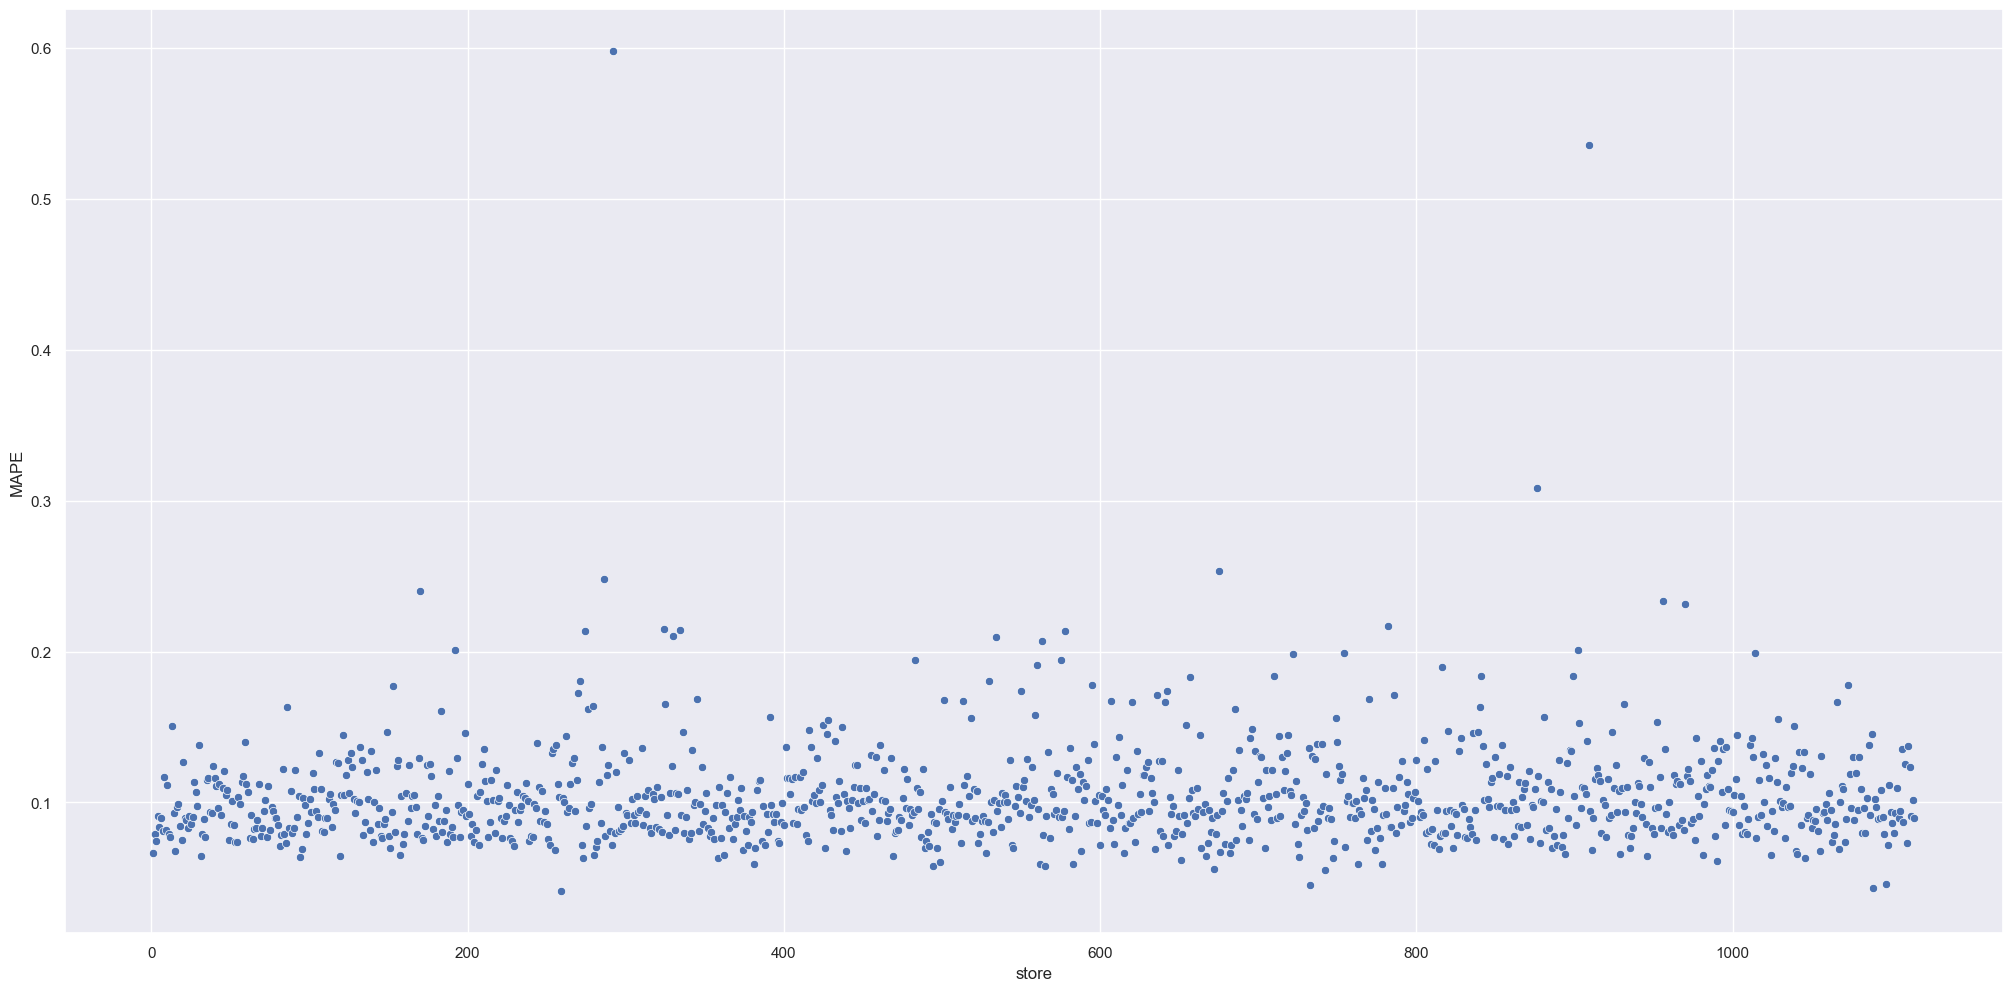

In [79]:
sns.scatterplot(x='store', y='MAPE', data=df9_aux3);

### 9.2. Total performance

In [80]:
df92 = df91[['predictions', 'worst_scenario', 'best_scenario']].apply( lambda x: np.sum(x), axis = 0).reset_index().rename(columns={'index': 'Scenario', 0: 'Values'})
df92['Values'] = df92['Values'].map( 'R${:,.2f}'.format)
df92

,Scenario,Values
0,predictions,"R$284,314,112.00"
1,worst_scenario,"R$255,205,795.00"
2,best_scenario,"R$313,422,431.33"


### 9.3. Machine learning performance

In [81]:
df9['error'] = df9['sales'] - df9['predictions']
df9['error_rate'] = df9['predictions'] / df9['sales']

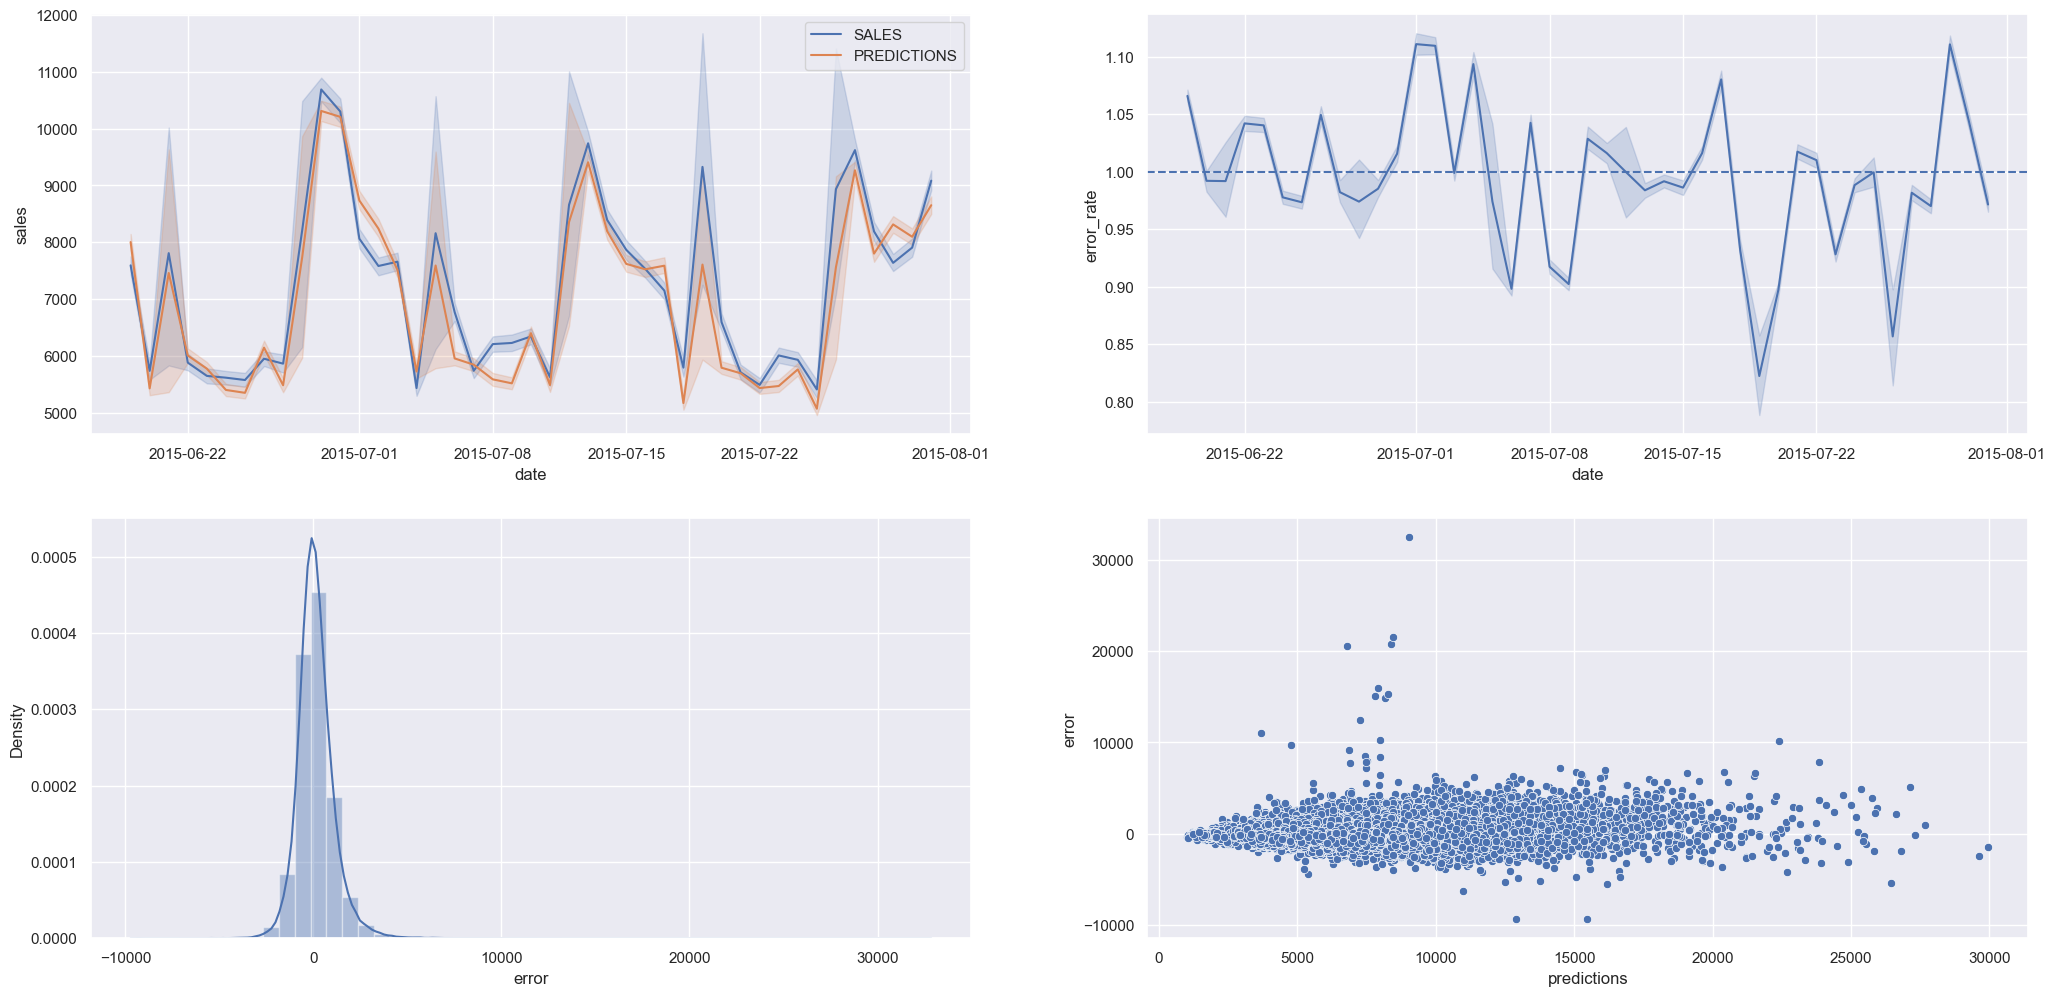

In [83]:
plt.subplot( 2, 2, 1 )
sns.lineplot(x='date', y='sales', data = df9, label='SALES');
sns.lineplot(x='date', y='predictions', data = df9, label='PREDICTIONS');

plt.subplot( 2, 2, 2 )
sns.lineplot(x='date', y='error_rate', data = df9)
plt.axhline(1, linestyle='--');

plt.subplot(2, 2, 3 )
sns.distplot(df9['error']);

plt.subplot(2, 2, 4 )
sns.scatterplot(x = 'predictions', y = 'error', data = df9);

## 10.0. PASSO 10 - Deploy model production

In [89]:
# Save Trained Model
pickle.dump( model_xgb_tuned, open('model/model_rossmann.pkl', 'wb'))

In [98]:
pwd!

'C:\\Users\\Zanga\\Documents\\repos\\ds_em_produçao\\store_sales_prediction'

### 10.1. Rossmann class

In [135]:
import pickle
import inflection
import pandas as pd
import numpy as np
import math
import datetime

class Rossmann(object):
    def __init__(self):
        self.home_path = ''
        self.competition_distance_scaler =  pickle.load(open(self.home_path + 'parameter/competition_distance_scaler.pkl', 'rb') )
        self.competition_time_month_scaler = pickle.load(open(self.home_path + 'parameter/competition_time_month_scaler.pkl', 'rb'))
        self.promo_time_week_scaler =              pickle.load(open(self.home_path + 'parameter/promo_time_week_scaler.pkl', 'rb'))
        self.year_scaler =                  pickle.load(open(self.home_path + 'parameter/year_scaler.pkl', 'rb'))
        self.store_type_scaler =            pickle.load(open(self.home_path + 'parameter/store_type_scaler.pkl', 'rb'))
        
    def data_cleaning(self, df1):
        
        old_columns = ['Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
                       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
                       'CompetitionDistance', 'CompetitionOpenSinceMonth',
                       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
                       'Promo2SinceYear', 'PromoInterval']
        
        snakecase = lambda x: inflection.underscore (x)
        new_columns = list(map(snakecase, old_columns))
        
        # rename columns
        df1.columns = new_columns
        
        ### 1.3 Data types
        df1['date'] = pd.to_datetime (df1['date'])

        ### 1.5 Fillout NA
        #competition_distance
        df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)
        
        #competition_open_since_month
        df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)
        
        #competition_open_since_year
        df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)
        
        #promo2_since_week
        df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis = 1)
        
        #promo2_since_year
        df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis = 1)
        
        #promo_interval
        month_map = {1: 'Jan',
                     2: 'Feb',
                     3: 'Mar',
                     4: 'Apr',
                     5: 'May',
                     6: 'Jun',
                     7: 'Jul',
                     8: 'Aug',
                     9: 'Sep',
                     10: 'Oct',
                     11: 'Nov',
                     12: 'Dec'}
        
        df1['promo_interval'].fillna(0, inplace = True)
        df1['month_map'] = df1['date'].dt.month.map(month_map)
        df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis = 1)

        ### 1.6 Change Data Types
        # competiton
        df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(np.int64)
        df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(np.int64)
        
        # promo2
        df1['promo2_since_week'] = df1['promo2_since_week'].astype(np.int64)
        df1['promo2_since_year'] = df1['promo2_since_year'].astype(np.int64)
        
        return df1

    def feature_engineering(self, df2):
        
        # year
        df2['year'] = df2['date'].dt.year
        
        # month
        df2['month'] = df2['date'].dt.month
        
        # day
        df2['day'] = df2['date'].dt.day
        
        # week of year
        df2['week_of_year'] = df2['date'].dt.isocalendar().week.astype(np.int64)
        
        # year week
        df2['year_week'] = df2['date'].dt.strftime ('%Y-%W')
        
        # competition since
        df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1), axis = 1)
        df2['competition_time_month'] = ((df2['date'] - df2['competition_since'] )/30).apply(lambda x: x.days).astype(np.int64)
        
        # promotion since
        df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
        df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
        df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply(lambda x: x.days).astype(np.int64)
        
        # assortment
        df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')
        
        # state holiday
        df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')
        
        ## Passo 03 - 3.0. FILTRAGEM DE VARIÁVEIS  
        ### 3.1. Filtragem das linhas
        df2 = df2[df2['open'] != 0]
                  
        ### 3.2. Filtragem das colunas
        cols_drop = ['open', 'promo_interval', 'month_map']
        df2 = df2.drop(cols_drop, axis=1)
        
        return df2

    def data_preparation(self, df5):
        
        # competition_distance
        df5['competition_distance'] = self.competition_distance_scaler.transform (df5[['competition_distance']].values)
        
        # competition_time_month
        df5['competition_time_month'] = self.competition_time_month_scaler.transform (df5[['competition_time_month']].values)
        
        # promo_time_week
        df5['promo_time_week'] = self.promo_time_week_scaler.transform (df5[['promo_time_week']].values)
        
        # year
        df5['year'] = self.year_scaler.transform (df5[['year']].values)
        
        ### 5.3. Transformação
        #### 5.3.1. Encoding
        
        # state_holiday - One hot encoding
        df5 = pd.get_dummies (df5, prefix = ['state_holiday'], columns = ['state_holiday'])
        
        # store_type - Label Encoding
        df5['store_type'] = self.store_type_scaler.transform (df5['store_type'])
        
        # assortment - Ordinal Encoding
        assortment_dict = {'basic': 0, 'extra': 1, 'extended': 2}
        df5['assortment'] = df5['assortment'].map (assortment_dict)
        
        #### 5.3.3. Nature transformation
        # day_of_week
        df5['day_of_week_sin'] = df5['day_of_week'].apply (lambda x: np.sin (x*2*np.pi/7))
        df5['day_of_week_cos'] = df5['day_of_week'].apply (lambda x: np.cos (x*2*np.pi/7))
        
        # month
        df5['month_sin'] = df5['month'].apply (lambda x: np.sin (x*2*np.pi/12))
        df5['month_cos'] = df5['month'].apply (lambda x: np.cos (x*2*np.pi/12))
        
        # day
        df5['day_sin'] = df5['day'].apply (lambda x: np.sin (x*2*np.pi/30))
        df5['day_cos'] = df5['day'].apply (lambda x: np.cos (x*2*np.pi/30))
        
        # week_of_year
        df5['week_of_year_sin'] = df5['week_of_year'].apply (lambda x: np.sin (x*2*np.pi/52))
        df5['week_of_year_cos'] = df5['week_of_year'].apply (lambda x: np.cos (x*2*np.pi/52))
        
        cols_selected = ['store',
                         'promo',
                         'store_type',
                         'assortment',
                         'competition_distance',
                         'competition_open_since_month',
                         'competition_open_since_year',
                         'promo2',
                         'promo2_since_week',
                         'promo2_since_year',
                         'competition_time_month',
                         'promo_time_week',
                         'day_of_week_sin',
                         'day_of_week_cos',
                         'month_cos',
                         'month_sin',
                         'day_sin',
                         'day_cos',
                         'week_of_year_cos',
                         'week_of_year_sin']
        
        return df5[cols_selected]
    
    def get_prediction(self, model, original_data, test_data):
        
        # prediction
        pred = model.predict(test_data)
        
        # join pred into the original data
        original_data['prediction'] = np.expm1(pred)
        return original_data.to_json(orient='records', date_format='iso')

### 10.2. API Handler

In [ ]:
import pickle
import pandas as pd
from flask             import Flask, request, Response
from rossmann.Rossmann import Rossmann

# loading model
model = pickle.load(open( 'model/model_rossmann.pkl', 'rb') )
# initialize API
app = Flask( __name__ )
@app.route( '/rossmann/predict', methods = ['POST'])

def rossmann_predict():
    test_json = request.get_json()
    
    if test_json: # there is data
        if isinstance( test_json, dict ): # unique example
            test_raw = pd.DataFrame( test_json, index=[0] )
        
        else: # multiple example
            test_raw = pd.DataFrame( test_json, columns=test_json[0].keys() )
            
        # Instantiate Rossmann class
        pipeline = Rossmann()
        
        # data cleaning
        df1 = pipeline.data_cleaning( test_raw )
        
        # feature engineering
        df2 = pipeline.feature_engineering( df1 )
        
        # data preparation
        df3 = pipeline.data_preparation( df2 )
        
        # prediction
        df_response = pipeline.get_prediction( model, test_raw, df3 )
        
        return df_response
    
    else:
        return Reponse( '{}', status=200, mimetype='application/json' )
    
if __name__ == '__main__':
    app.run('0.0.0.0')

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.6:5000
Press CTRL+C to quit


### 10.3. API tester

In [5]:
# loading test dataset
df10 = pd.read_csv('datasets/test.csv' )

In [12]:
# merge test dataset + store
df_test = pd.merge(df10, df_store_raw, how='left', on='Store')

# choose store for prediction
df_test = df_test[df_test['Store'].isin([16, 13, 22])]

# remove closed days
df_test = df_test[df_test['Open'] != 0]
df_test = df_test[~df_test['Open'].isnull()]
df_test = df_test.drop('Id', axis=1)

In [13]:
# convert Dataframe to json
data = json.dumps(df_test.to_dict(orient='records'))

In [18]:
# API Call
#url = 'http://192.168.1.6:5000/rossmann/predict'
url = 'https://rossmann-sales-predict-j3ri.onrender.com/rossmann/predict'
header = {'Content-type': 'application/json' }
data = data
r = requests.post(url, data = data, headers = header)
print('Status Code {}'.format(r.status_code))

Status Code 200


In [15]:
d1 = pd.DataFrame(r.json(), columns = r.json()[0].keys())

In [16]:
d1.head()

,store,day_of_week,date,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week,prediction
0,13,4,2015-09-17T00:00:00.000,1.0,1,regular_day,0,d,basic,310.0,...,2015,9,17,38,2015-37,2015-09-01T00:00:00.000,0,2009-11-02T00:00:00.000,306,6395.906738
1,16,4,2015-09-17T00:00:00.000,1.0,1,regular_day,0,a,extended,3270.0,...,2015,9,17,38,2015-37,2015-09-01T00:00:00.000,0,2015-09-14T00:00:00.000,0,7771.694336
2,22,4,2015-09-17T00:00:00.000,1.0,1,regular_day,0,a,basic,1040.0,...,2015,9,17,38,2015-37,2015-09-01T00:00:00.000,0,2012-05-21T00:00:00.000,173,4712.334473
3,13,3,2015-09-16T00:00:00.000,1.0,1,regular_day,0,d,basic,310.0,...,2015,9,16,38,2015-37,2015-09-01T00:00:00.000,0,2009-11-02T00:00:00.000,306,6919.637695
4,16,3,2015-09-16T00:00:00.000,1.0,1,regular_day,0,a,extended,3270.0,...,2015,9,16,38,2015-37,2015-09-01T00:00:00.000,0,2015-09-14T00:00:00.000,0,8022.373047


In [17]:
d2 = d1[['store', 'prediction']].groupby('store').sum().reset_index()

for i in range(len( d2 )):
    print('Store Number {} sell prediction is R${:,.2f} in the next 6 weeks'.format(d2.loc[i, 'store'], d2.loc[i, 'prediction']))

Store Number 13 sell prediction is R$231,734.52 in the next 6 weeks
Store Number 16 sell prediction is R$296,843.63 in the next 6 weeks
Store Number 22 sell prediction is R$177,770.58 in the next 6 weeks
